# Naive Bayes 실습
### 이번 실습 시간에는 SMS Spam Collection Dataset을 이용한 Naive Bayes 실습을 해볼 예정

# 1.1 SMS Spam Collection Dataset
## - SMS 스팸 데이터
## - spam과 ham으로 데이터가 분류되어 있음
## - https://archive.ics.uci.edu/dataset/228/sms+spam+collection
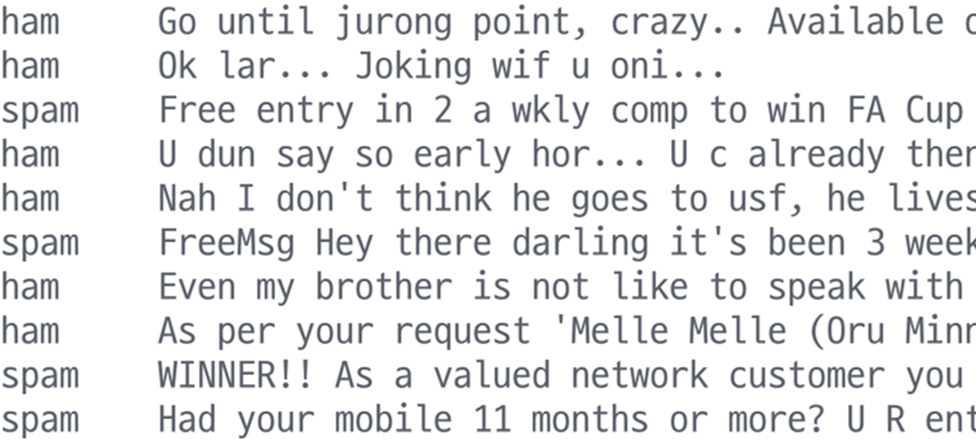


# 1.2 데이터 다운로드 및 압축 풀기

In [ ]:
!wget https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip
!unzip sms+spam+collection.zip

--2025-11-24 03:41:12--  https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘sms+spam+collection.zip’

sms+spam+collection     [ <=>                ] 198.65K  --.-KB/s    in 0.1s    

2025-11-24 03:41:12 (1.32 MB/s) - ‘sms+spam+collection.zip’ saved [203415]

Archive:  sms+spam+collection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


# 1.3 데이터 전처리
## - SMS를 ```re``` module을 사용하여 Bag-of-Words 형태로 변환
## - Train, Test 데이터 분리 (여기서는 8대2 비율 사용)

In [ ]:
import re

data = [line.strip().split("\t") for line in open("SMSSpamCollection", "r")]
for d in data:
  d[1] = set(re.findall("[a-z0-1_]+", d[1].lower()))

print(data[:3])

[['ham', {'great', 'available', 'wat', 'got', 'there', 'bugis', 'crazy', 'only', 'point', 'go', 'la', 'world', 'in', 'jurong', 'n', 'amore', 'e', 'until', 'buffet', 'cine'}], ['ham', {'u', 'wif', 'lar', 'ok', 'oni', 'joking'}], ['spam', {'entry', 'over1', 's', 'free', 'text', 'may', 'win', 'receive', 'to', '1st', '00', 'txt', 'wkly', 'rate', 'std', 'final', 'apply', '0', 'question', 't', 'cup', 'tkts', 'fa', 'in', 'comp', 'a', '100', 'c', '1'}]]


In [ ]:
import random

random.shuffle(data)

train_len = int(len(data) * 0.8)
test_len = len(data) - train_len

train = data[:train_len]
test = data[train_len:]

print(train[:3])
print(test[:3])

[['ham', {'tmr', 'lesson', 'haha', 'will', 'no', 'your', 'how', 'really', 'then', 'deduct', 'they', 'oh'}], ['spam', {'claim', 'from', '0ppm', 'guaranteed', 'been', 'with', 'line', 'land', 'urgent', 'valid', '0', 'only', 'awarded', 'has', 'call', 'your', '01', 'number', '000', 'hrs', 'mobile', 'a', 'prize', '1'}], ['ham', {'fusion', 'history', 'pages', 'half', 'got', 'nuclear', 'doing', 'covers', 'da', 'pros', 'description', 'cons', 'jet', 'abt', 'oso', 'intro', 'i', 'trends', 'n', 'brief', 'm', 'energy', 'iter', 'of'}]]
[['ham', {'only', 'try', 'ammae', 'sit', 'and', 'takes', 'life', 'the', 'lot', 'hold', 'steering', 'turns', 'you', 'yes', 'to', 'can', 'of'}], ['ham', {'u', 'invite', 'me', 'anywhere', 'guys', 'never'}], ['ham', {'there', 'be', 'a', 'minute', 'haha', 'awesome', 'in'}]]


#1.4 데이터 나누기
## - Train 데이터에서 Spam과 Ham 구분하기

In [ ]:
train_spam = [bow for cls, bow in train if cls == 'spam']
train_ham = [bow for cls, bow in train if cls == 'ham']


# 1.5 사전 확률(Prior probability) 구하기
## - 스팸 메시지와 일반 메시지의 개수를 세어 사전확률 구하기 (로그 적용)

In [ ]:
import math

prior_spam = math.log(len(train_spam) / len(train))
prior_ham = math.log(len(train_ham) / len(train))

# 1.6 Word Count
## - 가능도 계산을 위하여 각 단어별로 몇 개의 스팸 메시지와 일반 메세지에 등장했는지 세기

In [ ]:
from collections import Counter
spam_words = Counter(word for bow in train_spam for word in bow)
ham_words = Counter(word for bow in train_ham for word in bow)

print(spam_words)
print(ham_words)


Counter({'0': 429, '1': 381, 'to': 377, 'call': 247, 'a': 243, 'you': 191, 'your': 171, '00': 169, 'free': 142, 'now': 140, 'the': 138, 'for': 138, 'or': 138, 'txt': 123, 'u': 108, 'is': 106, 'have': 103, 'from': 94, '000': 94, 'mobile': 93, 'ur': 93, 'on': 89, 'text': 89, 'stop': 87, 'and': 87, 'claim': 86, '0p': 86, 'www': 78, 'of': 76, 'with': 75, 'reply': 74, 't': 72, 'only': 68, 'get': 68, 'prize': 67, 's': 66, 'our': 65, 'just': 62, 'won': 62, 'this': 60, 'uk': 60, 'send': 59, '01': 56, 'no': 55, 'are': 55, 'in': 55, 'new': 52, 'out': 49, 'urgent': 48, 'msg': 46, 'c': 46, 'win': 45, 'we': 45, 'cash': 45, 'co': 43, 'customer': 42, 'com': 42, 'service': 42, 'nokia': 40, 'please': 40, 'contact': 39, 'guaranteed': 38, 'box': 38, 'phone': 37, 'week': 37, 'be': 36, '10': 35, 'been': 34, 'cs': 34, '100': 34, '1000': 34, 'per': 34, 'i': 33, 'tone': 33, 'pobox': 33, '11': 31, 'm': 31, '0ppm': 30, 'draw': 30, 'awarded': 29, 'chat': 29, 'will': 29, 'mins': 29, 'sms': 29, 'min': 28, 'go': 27

# 1.7 라플라스 스무딩을 적용한 Naive Bayes 구현하기
##- Naive Bayes 방법에 따라 spam/ham 점수를 구하여 비교
##- 라플라스 스무딩 적용
##- prior와 가능도의 log 값들을 합산

In [ ]:
# 단어 w의 spam일 가능도 = p(w|spam) = log((w를 포함하는 스팸수 + a)/(스팸수+a))
def predict(bow, spam_words, ham_words, n_spams, n_hams, alpha):
  spam_score = prior_spam + sum(math.log((spam_words[word]+alpha)/(n_spams+alpha)) for word in bow)
  ham_score = prior_ham + sum(math.log((ham_words[word]+alpha)/(n_hams+alpha)) for word in bow)

  if spam_score < ham_score:
    return 'ham'
  else:
    return 'spam'

# 1.8 Test dataset을 이용하여 성능 확인하기
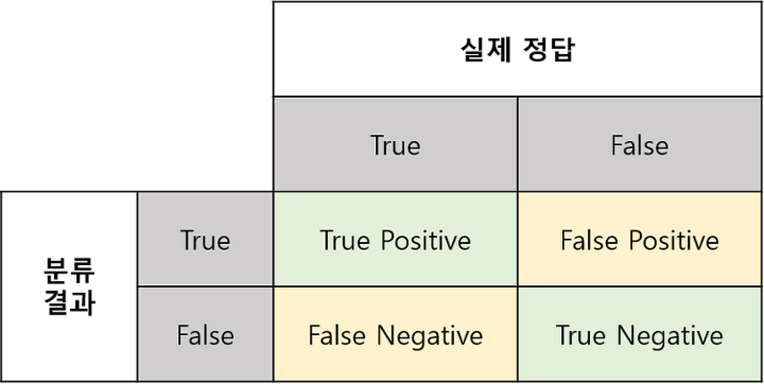

In [ ]:
tp, tn, fp, fn = 0, 0, 0, 0

for cls, bow in test:
  pred = predict(bow, spam_words, ham_words, len(train_spam), len(train_ham), 1e-4)
  if cls == 'spam' and pred == 'spam': tp += 1
  elif cls == 'ham' and pred == 'ham': tn += 1
  elif cls == 'ham' and pred == 'spam': fp += 1
  else: fn += 1

# 1.9 Precision, Recall, F1 Score, Accuracy 확인하기
##- precision = $\frac{TP}{TP+FP}$
##- recall = $\frac{TP}{TP+FN}$
##- F1 = $\frac{2\times precision\times recall}{precision + recall}$
## - acc = $\frac{TP+TN}{TP+FN+TN+FP}$

In [ ]:
acc = (tp + tn) / (tp + fn + tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print('acc: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

acc:  0.9695067264573991
precision:  0.8648648648648649
recall:  0.9467455621301775
f1:  0.903954802259887
